In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('../data/raw/customer_churn_large_dataset.xlsx')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
# describe the dataset
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [5]:
# Missing values count

df.isna().mean()

# Dataset is complete with no missing values

CustomerID                    0.0
Name                          0.0
Age                           0.0
Gender                        0.0
Location                      0.0
Subscription_Length_Months    0.0
Monthly_Bill                  0.0
Total_Usage_GB                0.0
Churn                         0.0
dtype: float64

<Axes: ylabel='Location'>

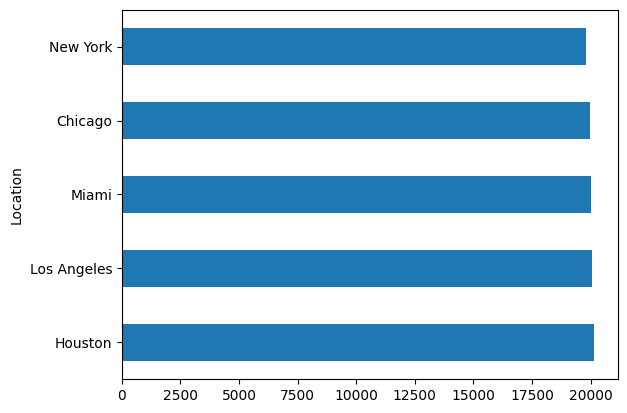

In [6]:
# Location wise distribution the dataset
df['Location'].value_counts().plot(kind = 'barh')

# All given locations have an approximately same amount of customers in this dataset

In [7]:
# Location wise distribution of Subscription_Length_Months and Monthly_Bill
df.groupby(by='Location').agg({'Subscription_Length_Months':['mean','std'],'Monthly_Bill':['mean','std','min','max']})

# From the above data we can see a lack of state level variance in Subscription_Length_Months and Monthly_Bill. 
# Our claim can be furthur solidified by performing a statistical test on the given variables.

Subscription_Length_Months           Monthly_Bill             \
                                  mean       std         mean        std   
Location                                                                   
Chicago                      12.520443  6.909878    64.819357  20.214524   
Houston                      12.464702  6.914670    65.127926  20.199523   
Los Angeles                  12.473030  6.906532    65.192377  20.189599   
Miami                        12.566322  6.938880    64.951278  20.333921   
New York                     12.425579  6.962438    65.174980  20.214994   

                            
               min     max  
Location                    
Chicago      30.00  100.00  
Houston      30.00  100.00  
Los Angeles  30.01  100.00  
Miami        30.00   99.98  
New York     30.01   99.99

In [8]:
# Location wise distribution of Age ,Gender and Data Consumption

df.groupby(by='Location').agg({'Age':'mean','Gender':'count','Total_Usage_GB':'mean'})

# From the above data also we can see a lack of state level variance in Age ,Gender and Data Consumption. 
# Our claim can be furthur solidified by performing a statistical test on the given variables.

,Age,Gender,Total_Usage_GB
Location,,,
Chicago,44.212697,19958,274.278134
Houston,44.081609,20157,273.838865
Los Angeles,43.875306,20041,273.986727
Miami,44.059957,20031,274.737756
New York,43.904608,19813,275.138142


In [ ]:
# Age column stats

df['Age'].min(), df['Age'].max(), df['Age'].mean(),  df['Age'].median(), df['Age'].std()

# Useful for normalizing the age column

(18, 70, 44.02702, 44.0, 15.280282876637067)

In [ ]:
# Gender wise distribution of dataset

df['Gender'].value_counts(normalize=True)*100

# Both male and females are present in the dataset with almost equal ratio

Gender
Female    50.216
Male      49.784
Name: proportion, dtype: float64

In [ ]:
# Churn count

df['Churn'].value_counts(normalize=True)*100

# Both 0 and 1 are approximately equal so need to furthur tweak them

Churn
0    50.221
1    49.779
Name: proportion, dtype: float64

In [ ]:
# Data grouped by churn , location and gender

df.groupby(by=['Churn','Location','Gender']).agg({'Age':'mean','Total_Usage_GB':'mean'})

# Trying to see any variables that has significant difference in churn and comparing 
# male vs female avg age and total data usage .

Age  Total_Usage_GB
Churn Location    Gender                           
0     Chicago     Female  44.120460      274.862076
                  Male    44.420386      274.754524
      Houston     Female  44.217366      273.517818
                  Male    43.813478      275.440433
      Los Angeles Female  43.553167      274.532055
                  Male    43.993397      272.111244
      Miami       Female  44.381220      275.143660
                  Male    43.734862      274.389660
      New York    Female  44.080887      275.686439
                  Male    43.727160      277.275119
1     Chicago     Female  44.103062      275.039424
                  Male    44.208569      272.435732
      Houston     Female  44.093534      270.403213
                  Male    44.210199      275.893194
      Los Angeles Female  43.830154      276.605722
                  Male    44.136914      272.704766
      Miami       Female  44.089503      275.816882
                  Male    44.032596      273.570221
      New York    Female  43.683083      274.079279
                  Male    44.121388      273.578852

In [61]:
# Selecting only numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
numerical_df = df[numerical_cols]

# Correlation value for churn 
numerical_df.corrwith(numerical_df['Churn'])

CustomerID                   -0.004586
Age                           0.001559
Subscription_Length_Months    0.002328
Monthly_Bill                 -0.000211
Total_Usage_GB               -0.002842
Churn                         1.000000
dtype: float64

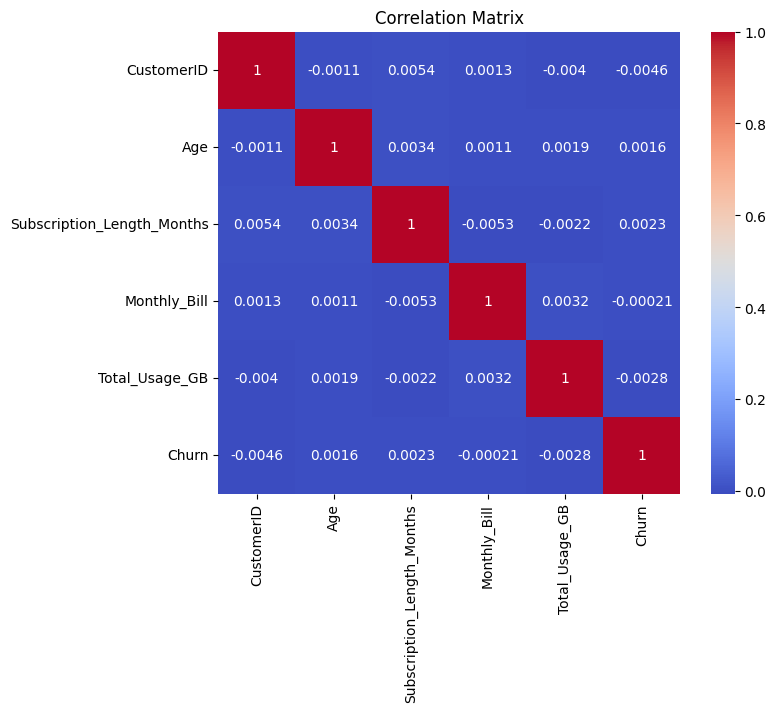

In [66]:
# Calculate correlation
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

<Axes: >

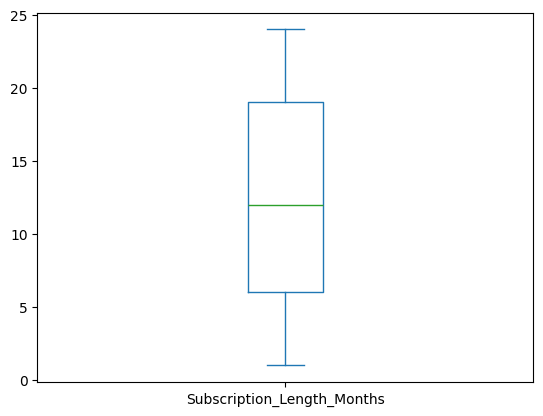

In [ ]:
# Distribution of Subscription months

df['Subscription_Length_Months'].plot(kind='box')

# There are no significant outliers and data is symmetrically distributed around the median

<Axes: >

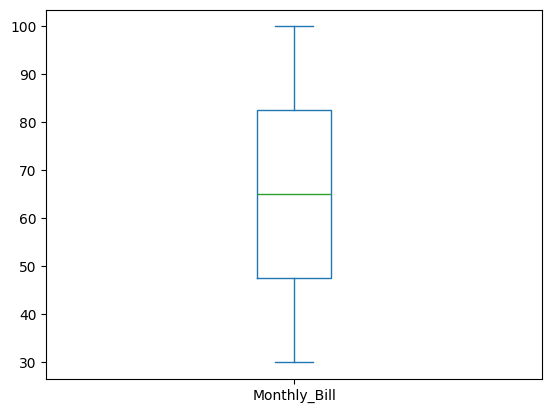

In [64]:
# Distribution of Monthly payment

df['Monthly_Bill'].plot(kind='box')

# There are no significant outliers and data is symmetrically distributed around the median

<Axes: >

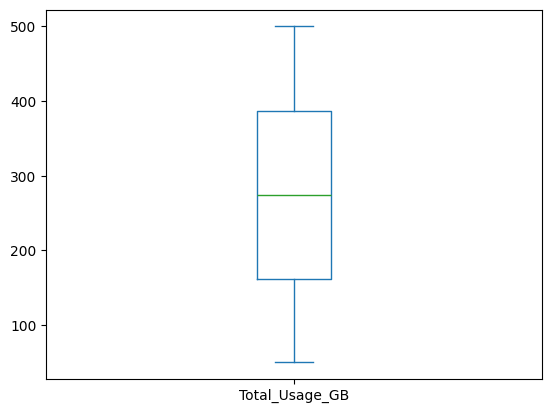

In [65]:
# Distribution of Total Data Usage

df['Total_Usage_GB'].plot(kind='box')

# There are no significant outliers and data is symmetrically distributed around the median

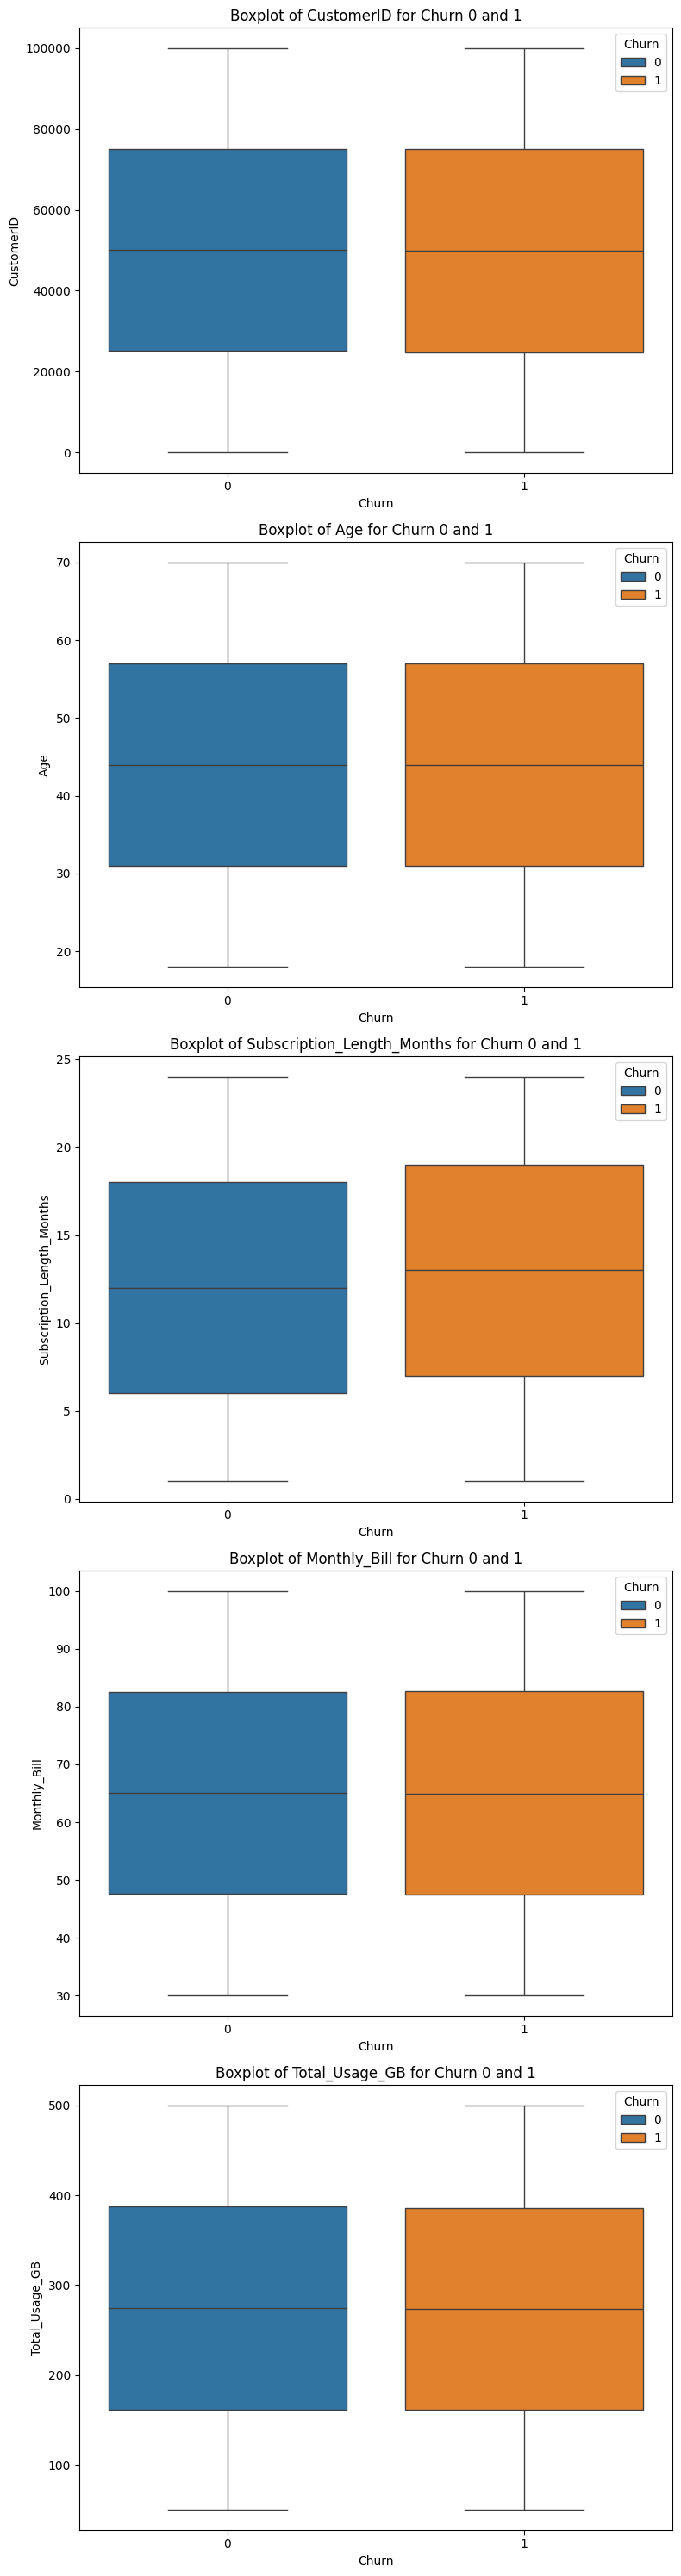

In [70]:
# Plotting the churm 0 vs 1 plots
fig, axes = plt.subplots(nrows=len(numerical_df.columns)-1, ncols=1, figsize=(8, 6*(len(numerical_df.columns)-1)))

for i, column in enumerate(numerical_df.columns):
    if column != 'Churn':
        sns.boxplot(x='Churn', y=column, data=numerical_df, ax=axes[i],hue='Churn')
        axes[i].set_title(f'Boxplot of {column} for Churn 0 and 1')

plt.tight_layout()
plt.show()